In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
from sklearn import ensemble
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [55]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [56]:
train_df = pd.read_csv('Train_Clean_data.csv')
target = pd.read_csv('train.csv')
test_df = pd.read_csv('Test_Clean_data.csv', index_col=0)

In [57]:
phys_col = ['PHY338032', 'PHY341578', 'PHY357120', 'PHY330576',
       'PHY337425', 'PHY314027', 'PHY327046', 'PHY412132', 'PHY350277',
       'PHY423534']

for col in phys_col:
    train_df.drop(col, inplace=True, axis=1)

train_df.head()

,Provider,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days
0,PRV51001,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000
1,PRV51003,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242
2,PRV51004,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530
3,PRV51005,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412
4,PRV51007,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333


In [58]:
print(train_df.shape)
print(target.shape)
print(test_df.shape)

(5410, 35)
(5410, 2)
(1353, 44)


In [59]:
target['PotentialFraud'].replace({'No':0, 'Yes':1}, inplace=True)
target.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


Text(0, 0.5, 'Frequency')

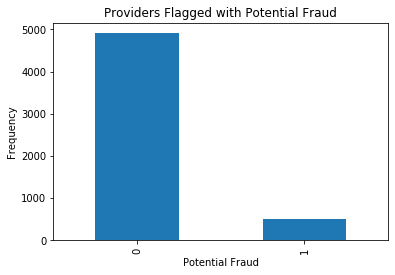

In [60]:
target['PotentialFraud'].value_counts().plot(kind = 'bar')
plt.title("Providers Flagged with Potential Fraud")
plt.xlabel("Potential Fraud")
plt.ylabel("Frequency")

In [61]:
final_df = pd.merge(train_df, target, on='Provider')

In [62]:
final_df.drop('Provider', axis=1, inplace=True)

In [63]:
final_df.head()

,ClaimID,DOD,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diagcode,Other_diagcode,V5861_diagcode,2724_diagcode,4011_diagcode,2449_diagcode,4019_diagcode,25000_diagcode,42731_diagcode,None_PHY,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_Days,PotentialFraud
0,25,0,11,5.0,2.0,3.0,80.0,8.0,12,1,25,0,2,0,1,3,1,2,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,132,1,78,62.0,39.0,48.0,693.0,29.0,30,7,132,6,16,3,12,25,15,11,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,149,1,28,0.0,0.0,0.0,385.0,23.0,76,2,149,4,12,6,8,22,8,3,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,1165,4,252,0.0,0.0,0.0,3016.0,259.0,565,56,1165,47,73,62,30,140,54,23,2,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,72,1,17,3.0,1.0,1.0,215.0,11.0,31,2,72,7,5,3,6,10,6,2,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


### Preparing data for train_test_split

In [64]:
target = final_df['PotentialFraud']
final_df.drop('PotentialFraud', axis=1, inplace=True)

In [65]:
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=random_state)


In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4328, 34), (4328,), (1082, 34), (1082,))

In [67]:
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(n_estimators=50, random_state=random_state)
randomForest.fit(X_train, y_train)  
randomForest.score(X_train, y_train) 

0.9995378927911276

In [68]:
y_pred = randomForest.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[970  21]
 [ 50  41]] 

Area Under the Curve: 0.7146793670507091
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       991
           1       0.66      0.45      0.54        91

    accuracy                           0.93      1082
   macro avg       0.81      0.71      0.75      1082
weighted avg       0.93      0.93      0.93      1082
 



### Random Forest with Grid Search Cross Validation
roc_auc scoring

In [69]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [70]:
randomForest2 = ensemble.RandomForestClassifier(random_state=random_state)
grid_search_forest = ms.GridSearchCV(randomForest2, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 20.7 s, sys: 3.55 s, total: 24.2 s
Wall time: 7min 51s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [71]:
# get the best parameters
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100}

In [30]:
# grid_search_forest.cv_results_

In [72]:
# get the best score
grid_search_forest.best_score_

0.9338540411658884

In [73]:
y_pred = grid_search_forest.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[973  18]
 [ 48  43]] 

Area Under the Curve: 0.7271820006431511
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.70      0.47      0.57        91

    accuracy                           0.94      1082
   macro avg       0.83      0.73      0.77      1082
weighted avg       0.93      0.94      0.93      1082
 



### Random Forest with Class Weight and Best Parameters from GridSearchCV

#### Random Forest with "balanced" Class Weight
Accuracy: 0.90, Best AUC: 0.832, Recall: 0.75

In [74]:
# Class Weight = 'balanced'
randomForest3 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest3.set_params(criterion = 'entropy', max_depth = 12, n_estimators = 100, class_weight = 'balanced')
randomForest3.fit(X_train, y_train) # fit 
randomForest3.score(X_train, y_train)


0.9916820702402958

In [75]:
y_pred = randomForest3.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[955  36]
 [ 37  54]] 

Area Under the Curve: 0.7785398254621262
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       991
           1       0.60      0.59      0.60        91

    accuracy                           0.93      1082
   macro avg       0.78      0.78      0.78      1082
weighted avg       0.93      0.93      0.93      1082
 



#### Random Forest with "balanced_subsample" Class Weight

In [76]:
# Class Weight = balanced_subsample
# This is the same as “balanced” except that weights are computed based on 
# the bootstrap sample for every tree grown

randomForest4 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest4.set_params(criterion = 'entropy', max_depth = 12, n_estimators = 100, class_weight = 'balanced_subsample')
randomForest4.fit(X_train, y_train) # fit 
randomForest4.score(X_train, y_train)


0.9902957486136784

In [77]:
y_pred = randomForest4.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[951  40]
 [ 39  52]] 

Area Under the Curve: 0.765532651001874
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       991
           1       0.57      0.57      0.57        91

    accuracy                           0.93      1082
   macro avg       0.76      0.77      0.76      1082
weighted avg       0.93      0.93      0.93      1082
 



#### Random Forest with Manual Class Weight

In [78]:
target.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [79]:
print(506/4904)
# Class 1 is about 10 times more prevalent than class 0

0.10318107667210441


In [80]:
randomForest5 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest5.set_params(criterion = 'entropy', max_depth = 2, n_estimators = 100, class_weight = {0:1, 1:10})
randomForest5.fit(X_train, y_train)
randomForest5.score(X_train, y_train)

0.8183918669131238

In [81]:
y_pred = randomForest5.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[803 188]
 [  7  84]] 

Area Under the Curve: 0.8666847783901265
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89       991
           1       0.31      0.92      0.46        91

    accuracy                           0.82      1082
   macro avg       0.65      0.87      0.68      1082
weighted avg       0.93      0.82      0.86      1082
 



In [82]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=labels, ax = ax, fmt='', cmap = "Blues"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix with Random Forest')
    ax.xaxis.set_ticklabels(['Not Fraud', 'Potential Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Potential Fraud'])
    return


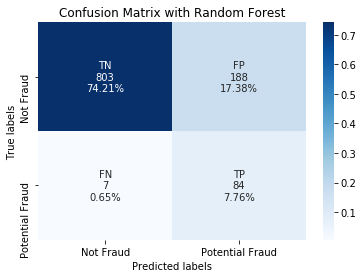

In [83]:
plot_cm(y_test, y_pred)

### Grid Search with "roc_auc" scoring and manual Class Weight
Class weight = {0:1, 1:10} resulted in the best AUC. To be sure, cross validate with {0:1, 1:10} class weight. Gird Search CV was also applied to other class weight, but they resulted in worst metric scores

In [84]:
randomForest6 = ensemble.RandomForestClassifier(class_weight = {0:1, 1:10}, random_state=random_state)
grid_search_forest2 = ms.GridSearchCV(randomForest6, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest2.fit(X_train, y_train)


CPU times: user 20.7 s, sys: 3.58 s, total: 24.2 s
Wall time: 8min 20s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                          

In [85]:
grid_search_forest2.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60}

In [86]:
grid_search_forest2.best_score_

0.9331880165909642

In [87]:
y_pred = grid_search_forest2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[865 126]
 [ 13  78]] 

Area Under the Curve: 0.8649992792273317
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       991
           1       0.38      0.86      0.53        91

    accuracy                           0.87      1082
   macro avg       0.68      0.86      0.73      1082
weighted avg       0.93      0.87      0.89      1082
 



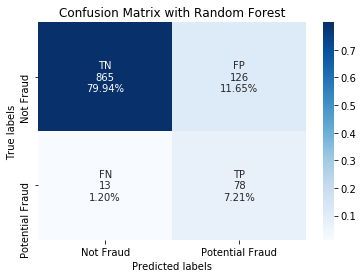

In [88]:
plot_cm(y_test, y_pred)

### Grid Search with "roc_auc" scoring and 'balanced' Class Weight


In [91]:
randomForest7 = ensemble.RandomForestClassifier(class_weight = 'balanced', random_state=random_state)
grid_search_forest3 = ms.GridSearchCV(randomForest7, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest3.fit(X_train, y_train)


CPU times: user 19.7 s, sys: 1.65 s, total: 21.3 s
Wall time: 9min 12s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [97]:
# get the best parameters
grid_search_forest3.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 100}

In [98]:
# get the best score
grid_search_forest3.best_score_

0.9329673241180811

In [101]:
y_pred = grid_search_forest3.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[957  34]
 [ 37  54]] 

Area Under the Curve: 0.7795489071977468
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       991
           1       0.61      0.59      0.60        91

    accuracy                           0.93      1082
   macro avg       0.79      0.78      0.78      1082
weighted avg       0.93      0.93      0.93      1082
 



### Grid Search with "roc_auc" scoring and 'balanced_subsample' Class Weight


In [106]:
randomForest8 = ensemble.RandomForestClassifier(class_weight = 'balanced_subsample', random_state=random_state)
grid_search_forest4 = ms.GridSearchCV(randomForest8, grid_para_forest, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_forest4.fit(X_train, y_train)

CPU times: user 21.2 s, sys: 3.97 s, total: 25.2 s
Wall time: 11min 9s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                   

In [107]:
# get the best parameters
grid_search_forest4.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 60}

In [108]:
# get the best score
grid_search_forest4.best_score_

0.9328925937850038

In [109]:
y_pred = grid_search_forest4.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[869 122]
 [ 15  76]] 

Area Under the Curve: 0.8560284317095619
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       991
           1       0.38      0.84      0.53        91

    accuracy                           0.87      1082
   macro avg       0.68      0.86      0.73      1082
weighted avg       0.93      0.87      0.89      1082
 



### Feature Importance from Model with Best Metrics
###### randomForest5
###### criterion = 'entropy', max_depth = 2, n_estimators = 100, class_weight = {0:1, 1:10}
###### Accuracy: 0.82, Best AUC: 0.867, Recall: 0.92

In [89]:
# Showing 20 most important features
feature_importance = list(zip(final_df.columns, randomForest5.feature_importances_))
dtype = [('feature', 'S30'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:20]]

[b'ClmProcedureCode',
 b'ClmProcedureCode_count',
 b'Inpatient',
 b'ClmDiagnosisCode_count',
 b'2449_diagcode',
 b'ClmAdmitDiagnosisCode',
 b'42731_diagcode',
 b'4019_diagcode',
 b'25000_diagcode',
 b'treatment_days',
 b'2724_diagcode',
 b'InscClaimAmtReimbursed',
 b'RenalDiseaseIndicator',
 b'Other_diagcode',
 b'DeductibleAmtPaid',
 b'duplicate',
 b'claim_Days',
 b'ClaimID',
 b'4011_diagcode',
 b'IPAnnualReimbursementAmt']

In [ ]:
# 2449_diagcode - Hypothyroidism
# 42731_diagcode - Atrial Fibrillation
# 4019_diagcode - Essential (primary) Hypertension
# 25000_diagcode - Diabetes Mellitus without complications
# 2724_diagcode - Hyperlipidemia
# 4011_diagcode - Unspecified Essential Hypertension

Text(0.5, 1.0, 'feature importance')

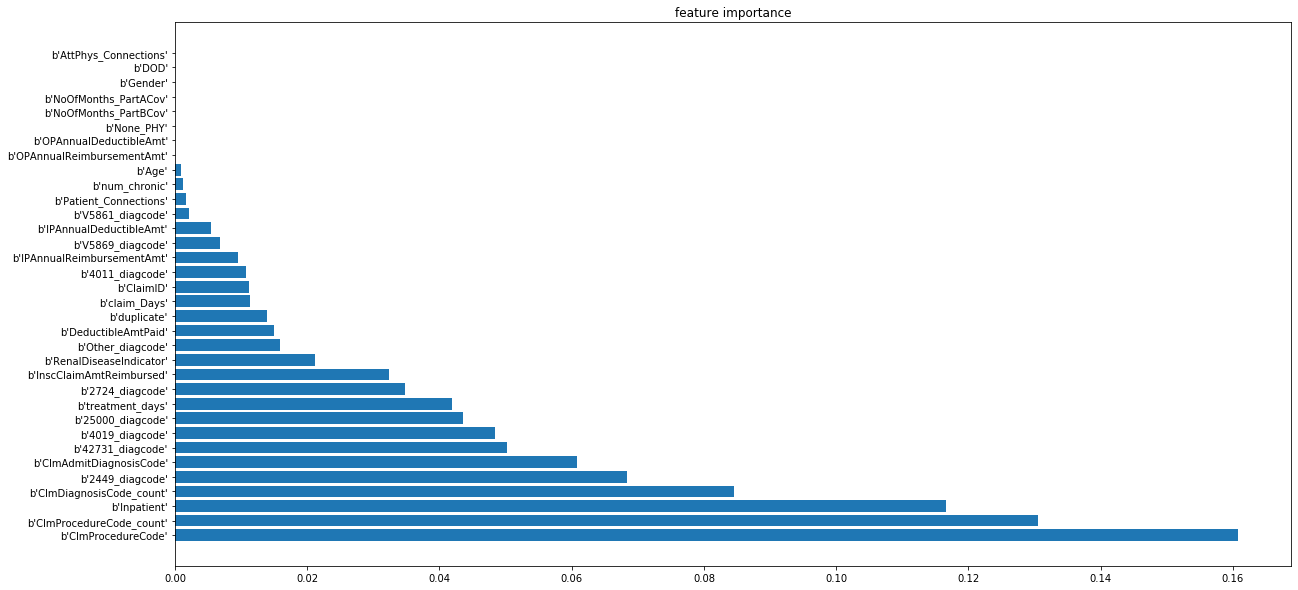

In [90]:
featureNames, featureScores = zip(*list(feature_sort))
plt.figure(figsize=(20,10))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

### GridSearchCV with scoring = 'accuracy'

In [114]:
randomForest_acc = ensemble.RandomForestClassifier(random_state=random_state)
grid_search_forest5 = ms.GridSearchCV(randomForest_acc, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest5.fit(X_train, y_train)

CPU times: user 19.5 s, sys: 1.4 s, total: 20.9 s
Wall time: 8min 32s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [115]:
# get the best parameters
grid_search_forest5.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 90}

In [116]:
# get the best score
grid_search_forest5.best_score_

0.9336883418547839

In [117]:
y_pred = grid_search_forest5.best_estimator_.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[975  16]
 [ 53  38]] 

Area Under the Curve: 0.7007185549062441
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       991
           1       0.70      0.42      0.52        91

    accuracy                           0.94      1082
   macro avg       0.83      0.70      0.74      1082
weighted avg       0.93      0.94      0.93      1082
 



### Random Forest with Class Weight

#### Random Forest with "balanced" Class Weight

In [118]:
# Class Weight = 'balanced'
randomForest_acc2 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_acc2.set_params(criterion = 'entropy', max_depth = 5, n_estimators = 90, class_weight = 'balanced')
randomForest_acc2.fit(X_train, y_train)
randomForest_acc2.score(X_train, y_train)


0.8946395563770795

In [119]:
y_pred = randomForest_acc2.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[870 121]
 [ 15  76]] 

Area Under the Curve: 0.8565329725773723
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       991
           1       0.39      0.84      0.53        91

    accuracy                           0.87      1082
   macro avg       0.68      0.86      0.73      1082
weighted avg       0.93      0.87      0.89      1082
 



#### Random Forest with "balanced_subsample" Class Weight

In [120]:
# Class Weight = balanced_subsample
# This is the same as “balanced” except that weights are computed based on 
# the bootstrap sample for every tree grown

randomForest_acc3 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_acc3.set_params(criterion = 'entropy', max_depth = 5, n_estimators = 90, class_weight = 'balanced_subsample')
randomForest_acc3.fit(X_train, y_train) # fit 
randomForest_acc3.score(X_train, y_train)


0.8941774491682071

In [121]:
y_pred = randomForest_acc3.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[871 120]
 [ 15  76]] 

Area Under the Curve: 0.8570375134451825
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       991
           1       0.39      0.84      0.53        91

    accuracy                           0.88      1082
   macro avg       0.69      0.86      0.73      1082
weighted avg       0.93      0.88      0.89      1082
 



#### Random Forest with Manual Class Weight
Accuracy: 0.838, Area Under the Curve: 0.878, Recall: 0.92
Best AUC of all models using manual class weight and best parameters from cross validation

In [122]:
randomForest_acc4 = ensemble.RandomForestClassifier(random_state=random_state)
randomForest_acc4.set_params(criterion = 'entropy', max_depth = 5, n_estimators = 90, class_weight = {0:1, 1:10})
randomForest_acc4.fit(X_train, y_train)
randomForest_acc4.score(X_train, y_train)

0.8886321626617375

In [123]:
y_pred = randomForest_acc4.predict(X_test)
print('Confusion Matrix: \n {} \n'.format(confusion_matrix(y_test, y_pred)))
print('Area Under the Curve: {}'.format(roc_auc_score(y_test, y_pred)))
print('Classification Report: \n {} \n'.format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[866 125]
 [ 14  77]] 

Area Under the Curve: 0.8600093146006366
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.93       991
           1       0.38      0.85      0.53        91

    accuracy                           0.87      1082
   macro avg       0.68      0.86      0.73      1082
weighted avg       0.93      0.87      0.89      1082
 



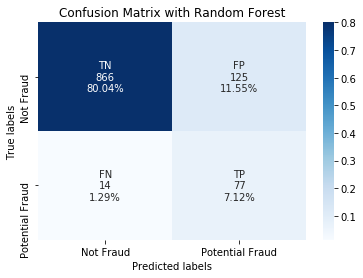

In [124]:
plot_cm(y_test, y_pred)